# NGS pipeline
> From sequencing reads to analysis

 from [session 2 PPT](ppt/session_02.pptx)

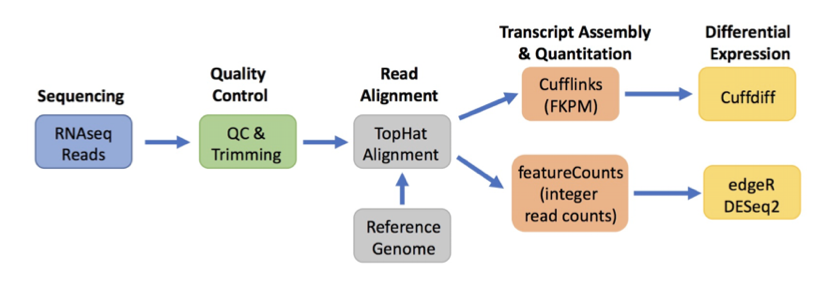

* **Sequencing**: generation of the files with the short sequence reads 
* **Quality control**: assessment of read quality and removal of poor quality and adaptor sequences at ends of reads 
* **Read alignment**: Mapping of reads to a reference genome 
* **Transcript assembly & quantitation**: assignment of reads to transcripts and/or genes; quantitation of reads for each transcript/gene 
* **Differential expression**: comparison of transcript/gene quantities in two different conditions 

#### The so-called “Tuxedo Package”

## Getting Started

* adrenal2.fastq(RNAseq/DNAseq reads) +adrenal_assembled_transcripts.gtf (refrence genome)
* adrenal_alignment.sam (or BAM alignment file)
* adrenal_alignment.bai (index file)
* adrenal_splice_junctions.bed (describing splice junction)
* adrenal_gene_expression.tabular 
* adrenal_featureCounts.txt 


## File format: FastQ
Human readable text-based files that contain the short reads output by the sequencer 

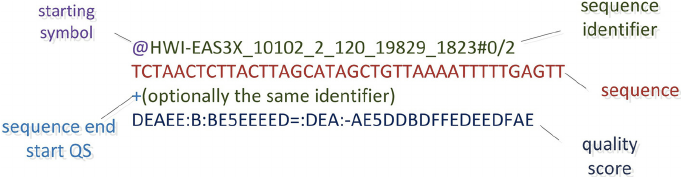

### QC Encoding
[QC encoding](https://support.illumina.com/help/BaseSpace_OLH_009008/Content/Source/Informatics/BS/QualityScoreEncoding_swBS.htm) is tightly compacted using ASCII.

Phred quality scores: Pr(base call error) 
Q+33=ASCII base 

$Q = -10 log_{10}P$

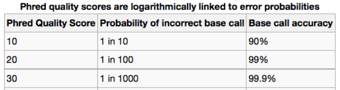

In [22]:
import numpy as np

def ASCII(prob):
    Q = int(np.log10(prob)*(-10))
    print(f"Q score: {Q}")
    A = chr(Q+33)
    print(f"ASCII: {A}")

ASCII(0.0002)

Q score: 36
ASCII: E


## File: SAM/BAM

Standard format for compactly representing alignment data 

* SAM: Sequence Alignment/Map
* BAM: binary version of a SAM file.

Some of the key information in the alignment portion of a SAM file:
* Column 1: Name of read
* Column 3: Name of reference sequence where the read aligned
* Column 4: Leftmost position in the reference sequence that aligns to the read
* Column 7: Name of reference sequence where the mate (if paired end) or next read aligns 

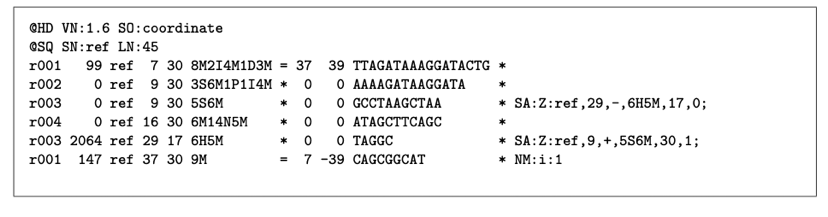

## View SAM/BAM in IGV

* [Download IGV](https://software.broadinstitute.org/software/igv/download)

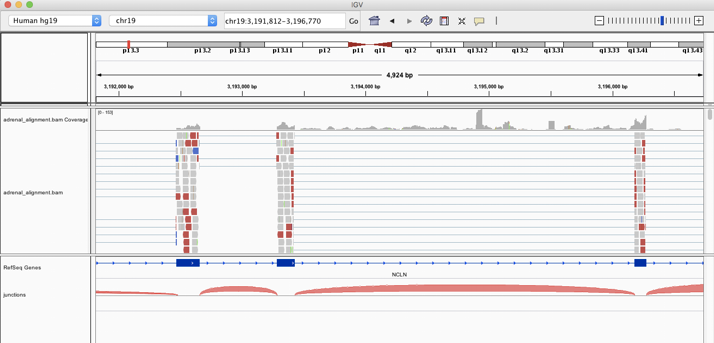

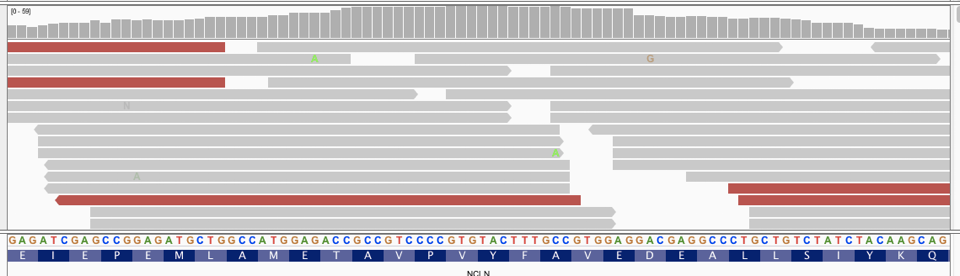

## BED

Track annotation ([Genome Browser](https://genome.ucsc.edu/cgi-bin/hgGateway))

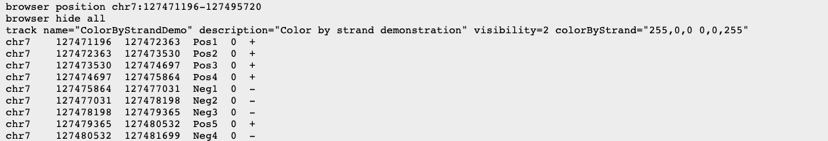

## Read Alignment

#### Tophat: splice aware mapper
Need to specify inner distance b/w paired end reads

* SAM file: alignment/human readable
* BAM file: alignment/machine only
* Index file:
    * To view BAM in IGV
    * Only meta data, no actual data
* BED file: splice junction & insertion and deletion

## Transcript Assembly & Quantitation

#### Cufflink
* assemble the aligned reads into transcripts and quantitate transcript levels 
* output files including 
    * [assembled transcripts file](http://mblab.wustl.edu/GTF22.html) ([gtf format](https://en.wikipedia.org/wiki/Gene_transfer_format)) => lists the coordinates of each transcript and its component exons
        * table head ```<seqname> <source> <feature> <start> <end> <score> <strand> <frame> [attributes] [comments]```
    * transcript expression file => gives the normalized expression level of each transcript in FPKM 
    * gene expression file that gives => normalized expression level of each gene (sum of all transcripts for that gene) in FPKM 

#### FPKM: Fragments per kilobase of exon per million reads mapped

Explaination [video, RPKM vs FPKM vs TPM](https://www.rna-seqblog.com/rpkm-fpkm-and-tpm-clearly-explained/)
* **million** is the unit calculating fragements/reads
* A **f**ragment could be a paired-end sequence (2 **r**eads)
* number of fragements < number of reads
* TPM: normalize the **gene lenth** first, then replica, just in different order from RMKM/FPKM
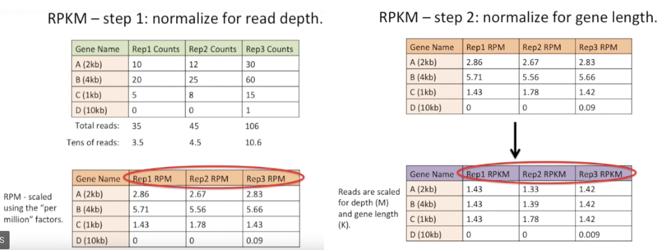

* FeatureCount: raw integer read counts 
* assemble the aligned reads into transcripts and quantitate transcript levels 
* output files including 
    * 3-column file => gene name, number of reads mapped to that gene, length of the gene. 
